In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")

# Extract features (data) and target labels (classes)
X = data.values[:, 1:]  # Assuming the first column is an identifier, not a feature
y = labels.values[:, 1]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Perform PCA for feature selection
n_components = 5  # Set the desired number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Fit the KNN model on the training data with PCA-transformed features
knn_classifier.fit(X_train_pca, y_train)

# Predict on the test data with PCA-transformed features
y_pred = knn_classifier.predict(X_test_pca)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the selected feature indices (principal components)
selected_feature_indices = range(n_components)
print("Selected Features (Principal Components):", selected_feature_indices)


Accuracy: 97.52%
Selected Features (Principal Components): range(0, 5)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['LUAD', 'BRCA', 'LUAD', 'KIRC', 'BRCA', 'BRCA', 'BRCA', 'COAD',
       'PRAD', 'LUAD', 'COAD', 'BRCA', 'LUAD', 'PRAD', 'KIRC', 'LUAD',
       'LUAD', 'PRAD', 'BRCA', 'LUAD', 'LUAD', 'COAD', 'KIRC', 'BRCA',
       'BRCA', 'BRCA', 'COAD', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'PRAD',
       'PRAD', 'COAD', 'BRCA', 'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA',
       'COAD', 'BRCA', 'BRCA', 'BRCA', 'KIRC', 'PRAD', 'KIRC', 'COAD',
       'BRCA', 'BRCA', 'PRAD', 'LUAD', 'KIRC', 'BRCA', 'KIRC', 'BRCA',
       'KIRC', 'BRCA', 'LUAD', 'LUAD', 'LUAD', 'KIRC', 'PRAD', 'BRCA',
       'PRAD', 'BRCA', 'LUAD', 'PRAD', 'KIRC', 'BRCA', 'BRCA', 'LUAD',
       'BRCA', 'BRCA', 'BRCA', 'LUAD', 'PRAD', 'PRAD', 'KIRC', 'BRCA',
       'KIRC', 'BRCA', 'BRCA', 'KIRC', 'LUAD', 'BRCA', 'BRCA', 'PRAD',
       'COAD', 'COAD', 'COAD', 'KIRC', 'BRCA', 'BRCA', 'BRCA', 'PRAD',
       'LUAD', 'COAD', 'COAD', 'BRCA', 'BRCA', 'BRCA', 'BRCA', 'LUAD',
       'BRCA', 'KIRC', 'BRCA', 'KIRC', 'BRCA', 'BRCA', 'PRAD', 'KIRC',
       'PRAD', 'BRCA', 'LUAD', 'PRAD', 'BRCA', 'LUAD', 'LUAD', 'PRAD',
       'KIRC', 'KIRC', 'BRCA', 'LUAD', 'LUAD', 'PRAD', 'BRCA', 'BRCA',
       'LUAD', 'BRCA', 'BRCA', 'BRCA', 'PRAD', 'KIRC', 'COAD', 'BRCA',
       'PRAD', 'LUAD', 'PRAD', 'BRCA', 'BRCA', 'KIRC', 'PRAD', 'LUAD',
       'PRAD', 'COAD', 'KIRC', 'BRCA', 'PRAD', 'KIRC', 'BRCA', 'PRAD',
       'BRCA', 'KIRC', 'KIRC', 'COAD', 'PRAD', 'COAD', 'LUAD', 'BRCA',
       'COAD'], dtype=object)

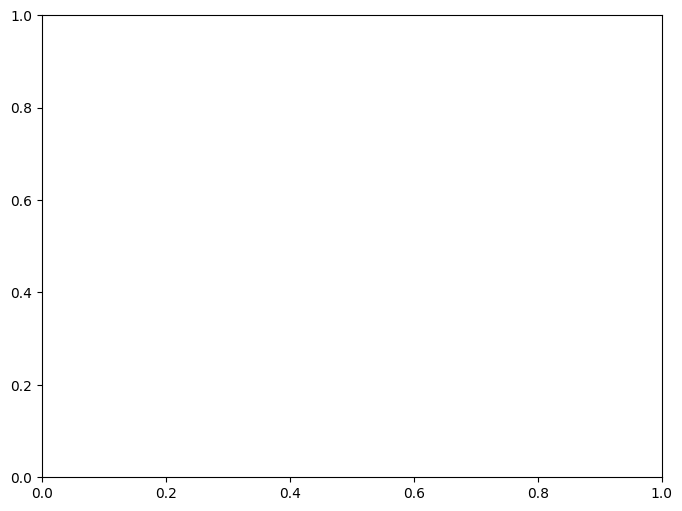

In [2]:
import matplotlib.pyplot as plt

# Scatter plot for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=50)
plt.title('Scatter Plot of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class Label')
plt.show()


Accuracy: 63.98%


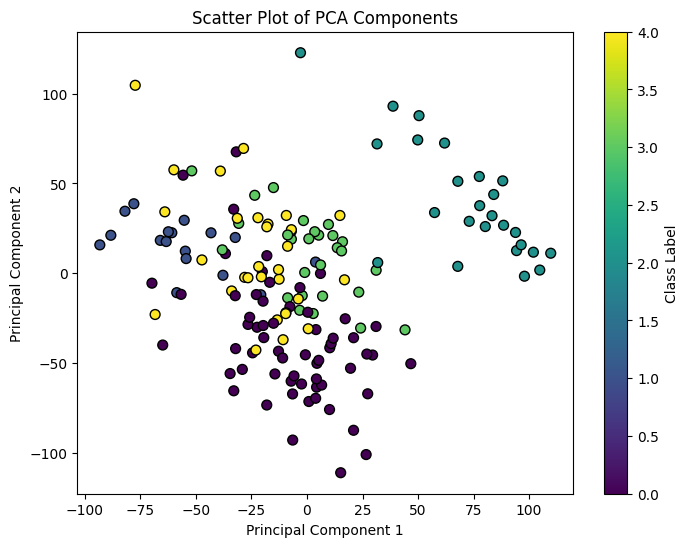

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have loaded 'data.csv' and 'labels.csv'
data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")

# Extract features (data) and target labels (classes)
X = data.values[:, 1:]
y = labels.values[:, 1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Perform PCA for feature selection
n_components = 2  # Set the desired number of components for visualization
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN model on the training data with PCA-transformed features
knn_classifier.fit(X_train_pca, y_train)

# Predict on the test data with PCA-transformed features
y_pred = knn_classifier.predict(X_test_pca)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Use LabelEncoder to convert class labels to numerical values
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Scatter plot for the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_encoded, cmap='viridis', edgecolors='k', s=50)
plt.title('Scatter Plot of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Class Label')
plt.show()
